In [1]:
import uproot
import numpy as np
import awkward as ak
import math as m
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import os
import numba as nb
import boost_histogram as bh
import yaml
import json
from coffea import hist as chist
from coffea.nanoevents.methods import vector
from coffea.util import save
from coffea.util import load

In [2]:
muons_hist_2018 = load('data_muon')
muons_hist_pass_2018 = load('data_muon_pass')
muons_hist_WJets = load('mc_muon_WJets')
muons_hist_pass_WJets = load('mc_muon_WJets_pass')
muons_hist_DYJetsToLL_M50 = load('mc_muon_DYJetsToLL_M-50')
muons_hist_pass_DYJetsToLL_M50 = load('mc_muon_DYJetsToLL_M-50_pass')
muons_hist_DYJetsToLL_M10to50 = load('mc_muon_DYJetsToLL_M-10to50')
muons_hist_pass_DYJetsToLL_M10to50 = load('mc_muon_DYJetsToLL_M-10to50_pass')

n_2018 = muons_hist_2018.values()[()]
npass_2018 = muons_hist_pass_2018.values()[()]
n_WJets = muons_hist_WJets.values()[()]
npass_WJets = muons_hist_pass_WJets.values()[()]
n_DYM50 = muons_hist_DYJetsToLL_M50.values()[()]
npass_DYM50 = muons_hist_pass_DYJetsToLL_M50.values()[()]
n_DYM10to50 = muons_hist_DYJetsToLL_M10to50.values()[()]
npass_DYM10to50 = muons_hist_pass_DYJetsToLL_M10to50.values()[()]

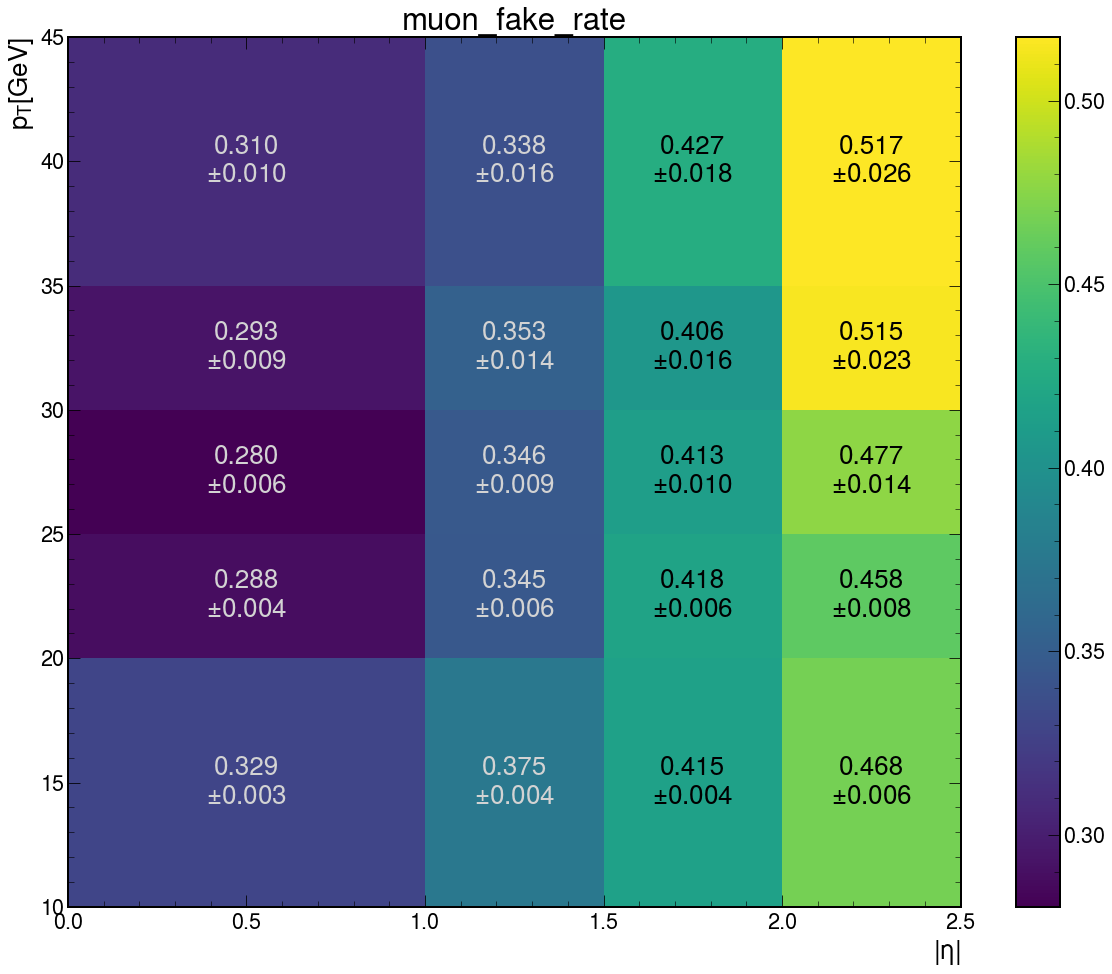

In [3]:
mpl.style.use(hep.style.CMS)
muon_ptbins=np.array([10,20,25,30,35,45])
muon_etabins=np.array([0,1.0,1.5,2.0,2.5])
fig, ax = plt.subplots(figsize=(20,16))
x1, x2 = np.meshgrid(muon_etabins, muon_ptbins)
sumw = (npass_2018-npass_WJets-npass_DYM50-npass_DYM10to50)/(n_2018-n_WJets-n_DYM50-n_DYM10to50)
err_sumw = np.sqrt((npass_2018-npass_WJets-npass_DYM50-npass_DYM10to50))/(n_2018-n_WJets-n_DYM50-n_DYM10to50)
# sumw = (npass_WJets+npass_DYM50+npass_DYM10to50)/(n_WJets+n_DYM50+n_DYM10to50)
# err_sumw = np.sqrt((npass_WJets+npass_DYM50+npass_DYM10to50))/(n_WJets+n_DYM50+n_DYM10to50)
pc = plt.pcolormesh(x1,x2,sumw.T)
plt.colorbar()
plt.title('muon_fake_rate')
plt.xlabel('$|\eta|$')
plt.ylabel('$\mathrm{p_T[GeV]}$')

x_centers = muons_hist_2018.axis('x').centers()
y_centers = muons_hist_2018.axis('y').centers()
# text_opts = {'format':'%d'}
for ix, xcenter in enumerate(x_centers):
    for iy, ycenter in enumerate(y_centers):
        opts = {
            "horizontalalignment": "center",
            "verticalalignment": "center",
        }
#         opts.update(text_opts)
#         txtformat = opts.pop("format", "%d\n$\pm$%d")
        opts["color"] = (
                            "black" if pc.norm(sumw[ix, iy]) > 0.5 else "lightgrey"
                        )
        ax.text(xcenter, ycenter, "%.3f\n$\pm$%.3f" %(sumw[ix, iy],err_sumw[ix, iy]), **opts)
# plt.savefig('new_muon_fake_rate_MC.png')